In [26]:
%pip install opendatasets --upgrade


In [27]:
#from google.colab import drive
#drive.mount('/content/drive/')


In [28]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/saraparsaseresht/persian-traffic-sign-dataset-ptsd?resource=download')

Skipping, found downloaded files in "./persian-traffic-sign-dataset-ptsd" (use force=True to force download)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [49]:
import tensorflow as tf
from tensorflow import keras # Import the keras module
image_size = (32, 32)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=[ '10_Maximum Speed 30', '11_Maximum Speed 40', '12_Maximum Speed 50', '13_Maximum Speed 60',"14_Maximum Speed 70","15_Maximum Speed 80","16_Maximum Speed 90"]
)

Found 1366 files belonging to 7 classes.
Using 1093 files for training.
Using 273 files for validation.


In [64]:
print(os.listdir("/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/test"))


['PTSD_00506.jpg', 'PTSD_02215.jpg', 'PTSD_00197.jpg', 'PTSD_00618.jpg', 'PTSD_00474.jpg', 'PTSD_02315.jpg', 'PTSD_00360.jpg', 'PTSD_02181.jpg', 'PTSD_01060.jpg', 'PTSD_02135.jpg', 'PTSD_00687.jpg', 'PTSD_02276.jpg', 'PTSD_01078.jpg', 'PTSD_01145.jpg', 'PTSD_00220.jpg', 'PTSD_00700.jpg', 'PTSD_00031.jpg', 'PTSD_01833.jpg', 'PTSD_00091.jpg', 'PTSD_00481.jpg', 'PTSD_00976.jpg', 'PTSD_00254.jpg', 'PTSD_01598.jpg', 'PTSD_01362.jpg', 'PTSD_00081.jpg', 'PTSD_01535.jpg', 'PTSD_00794.jpg', 'PTSD_01368.jpg', 'PTSD_01129.jpg', 'PTSD_00630.jpg', 'PTSD_00130.jpg', 'PTSD_02160.jpg', 'PTSD_01484.jpg', 'PTSD_01025.jpg', 'PTSD_01875.jpg', 'PTSD_00580.jpg', 'PTSD_01334.jpg', 'PTSD_01215.jpg', 'PTSD_02083.jpg', 'PTSD_00758.jpg', 'PTSD_00697.jpg', 'PTSD_00631.jpg', 'PTSD_01490.jpg', 'PTSD_01118.jpg', 'PTSD_01029.jpg', 'PTSD_00641.jpg', 'PTSD_00240.jpg', 'PTSD_01056.jpg', 'PTSD_00020.jpg', 'PTSD_01832.jpg', 'PTSD_00993.jpg', 'PTSD_00688.jpg', 'PTSD_00441.jpg', 'PTSD_01749.jpg', 'PTSD_01564.jpg', 'PTSD_022

In [69]:
test_ds=keras.utils.image_dataset_from_directory (
    "/content/persian-traffic-sign-dataset-ptsd/PTSD_Recognition/PTSD_Recognition/test",
    labels=None,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    #class_names=[ '10_Maximum Speed 30', '11_Maximum Speed 40', '12_Maximum Speed 50', '13_Maximum Speed 60',"14_Maximum Speed 70","15_Maximum Speed 80","16_Maximum Speed 90"]
)

Found 2421 files.


In [50]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

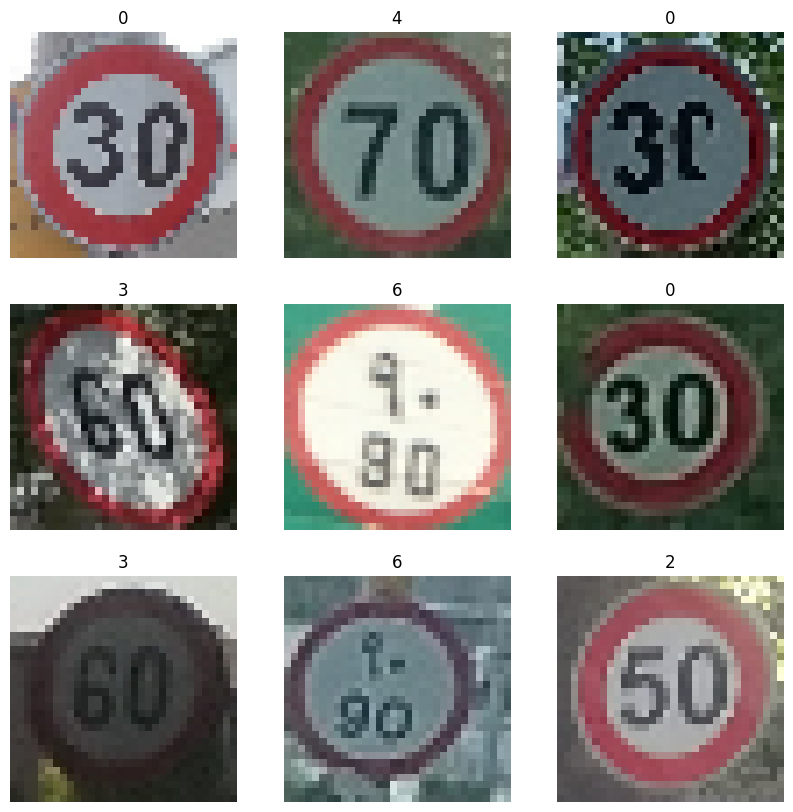

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [53]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

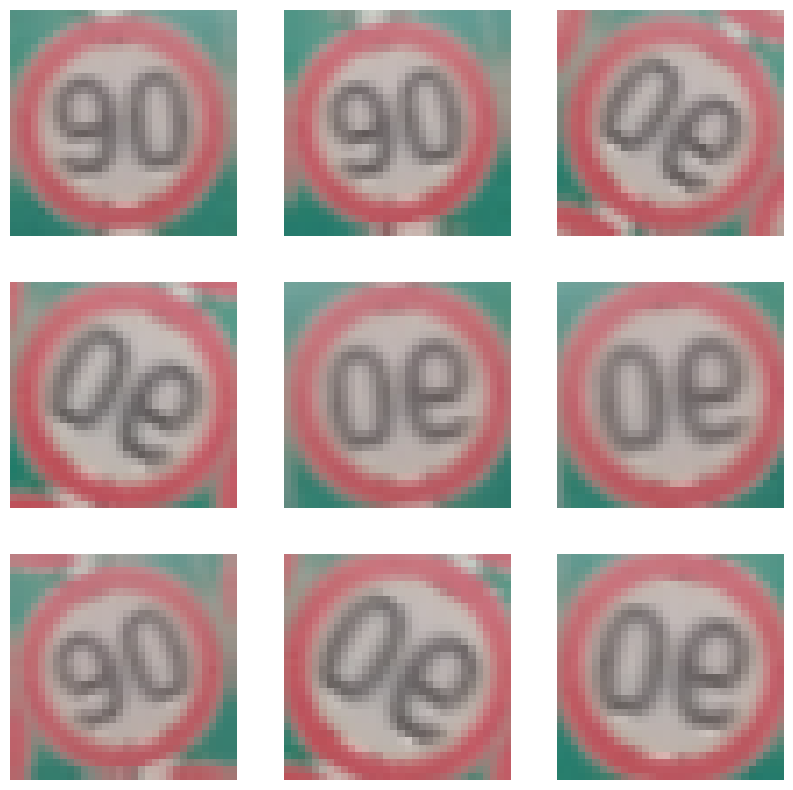

In [54]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy






In [56]:
len(train_ds)

9

In [57]:
model = Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation="softmax")
  ])






In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 240,489 (939.41 KB)

 Trainable params: 240,489 (939.41 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
metrics = ['accuracy']

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=metrics)

In [61]:
history = model.fit(train_ds, batch_size=128, epochs=20, validation_data=val_ds, validation_batch_size=128)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 338ms/step - accuracy: 0.2731 - loss: 1.9409 - val_accuracy: 0.4359 - val_loss: 1.6030
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4166 - loss: 1.6301 - val_accuracy: 0.4725 - val_loss: 1.4647
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4785 - loss: 1.4665 - val_accuracy: 0.5751 - val_loss: 1.2702
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5472 - loss: 1.2886 - val_accuracy: 0.5714 - val_loss: 1.0893
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6281 - loss: 1.0759 - val_accuracy: 0.6667 - val_loss: 0.8999
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6751 - loss: 0.9487 - val_accuracy: 0.7399 - val_loss: 0.7714
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7378 - loss: 0.7955 - val_accuracy: 0.7619 - val_loss: 0.6807
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7807 - loss: 0.6774 - val_accuracy: 0.7949 - val_loss: 0.5

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [72]:
model.predict(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


array([[4.5818035e-02, 1.1009803e-02, 5.3992414e-01, ..., 1.2522157e-01,
        1.5849104e-06, 5.0750731e-07],
       [5.0746929e-02, 1.6838351e-02, 2.0429762e-01, ..., 3.7108727e-02,
        4.6732879e-05, 1.9565299e-05],
       [9.0924269e-03, 3.7405282e-02, 3.4074393e-01, ..., 1.0948564e-02,
        7.4454008e-05, 4.2802338e-05],
       ...,
       [2.6476422e-01, 2.9436036e-03, 5.0245547e-01, ..., 1.9065884e-03,
        2.7249399e-08, 2.4514135e-08],
       [1.8655827e-03, 1.0374346e-03, 6.4683938e-01, ..., 1.5483022e-02,
        4.9739185e-08, 5.0496642e-08],
       [4.0392512e-03, 3.5521653e-03, 8.8709676e-01, ..., 2.2311108e-02,
        2.7723169e-07, 3.7555230e-07]], dtype=float32)

In [ ]:
#plotting graphs for accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Assuming 'history' is the variable that stores the output of model.fit()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show() # Added to display the plot

In [ ]:
# Assuming 'model' is your defined Keras model and you have training and validation data
history = model.fit(train_ds, epochs=10, validation_data=val_ds) # Train the model and store history

# Now you can plot the training history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Step 8: Save the Model
Finally, save your trained model for future use.

In [ ]:
model.save("model.h5")